# Downloading Datas (dynamic)

In [ ]:
!pip install gdown

In [1]:
import subprocess
import zipfile
import os

# Download the IMDb dataset
subprocess.run(['gdown', 'https://drive.google.com/uc?id=1hyn6U44cvUNedMnzPHzHsiBgXMHFBjBw', '-O', 'imdb_440.zip'])

# Extract the contents of the zip file
zip_file_path = 'imdb_440.zip'
extracted_dir = '.'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Set the dataset path
dataset_path = os.path.join(extracted_dir, 'IMDB Dataset.csv')

# Download the GloVe file
subprocess.run(['gdown', 'https://drive.google.com/uc?id=1CLrwskD-M8ce0M5agxRjB3OhKuKiCcCn', '-O', 'glove.6B.100d.txt'])

# Set the GloVe path
glove_path = 'glove.6B.100d.txt'


# Importing Dataset csv

In [2]:
import pandas as pd

# Update the file path to your CSV file
filepath_dict = {'yelp': 'IMDB Dataset.csv'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath)  # Use pandas read_csv directly without specifying names and sep
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0]) 

review       One of the other reviewers has mentioned that ...
sentiment                                             positive
Name: 0, dtype: object


In [3]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


# Data Splitting

In [4]:
from sklearn.model_selection import train_test_split
# Assuming 'review' is the feature and 'sentiment' is the target
X = df['review']
y = df['sentiment']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

C:\Users\Ikramul\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training set shape: (40000,) (40000,)
Testing set shape: (10000,) (10000,)


# Tokenization

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_tokenize = tokenizer.texts_to_sequences(X_train)
X_test_tokenize = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])
print(X_train_tokenize[2])


I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.
[3, 1335, 113, 62, 2836, 4, 50896, 1, 1278, 15, 14341, 4570, 2594, 20, 1

In [6]:
for word in ['the', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 29
happy: 680
sad: 635


# Padding

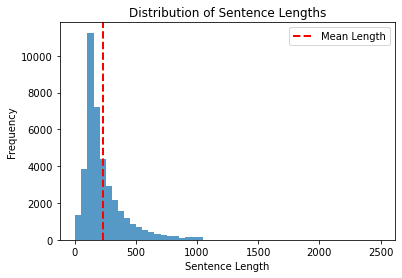

Average sequence length: 234.87535


In [7]:
import matplotlib.pyplot as plt

# Calculate the lengths of sentences
sentence_lengths = [len(seq) for seq in X_train_tokenize]

# Plot the histogram
plt.hist(sentence_lengths, bins=50, alpha=0.75)
plt.axvline(x=np.mean(sentence_lengths), color='red', linestyle='dashed', linewidth=2, label='Mean Length')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Average sequence length:", np.mean(sentence_lengths))



In [8]:
from keras.preprocessing.sequence import pad_sequences

val = 235

# Pad sequences
X_train_pad = pad_sequences(X_train_tokenize, padding='post', maxlen=val)
X_test_pad = pad_sequences(X_test_tokenize, padding='post', maxlen=val)

print("Padded sequence example:")
print(X_train_pad[0, :])


Padded sequence example:
[  367    55  3765     3   278 10620     7     7   157  1707   187     6
     1 11696 11505   727  1935     1  1200     4  2946 11506  3749  1828
     2 34820   147   144     3   228     4     3   207   323     2   144
  1083    16    88     4   132  2871  8743    18    10   153  9253    99
     4     1  4020   302    11    17  1001    35     1 17118   496   492
  2619   249    71    77   107   107   698 10014    60 13110    86  1047
  1363     5   229   132    23  4360    31   138 18119   209  1154    14
  4501  5313    31     3 26199  2386     2 50895     8 31951    11     6
     3   445    14   624     4     1   718  2959     1  1278 16653     2
    71  3616     1   166  1507     1  1245     5  1629     1   879  1268
     5     1   310   140  2894     2   410   633     7     7     1   269
     6  3553  1000     5    26    39 13694    14  1381   217    65 18120
     2    46     6    30   219    27   193  1484     8  1101    18    10
  4905 21668 29671    84  

# Encoding labels

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Embedding 

In [10]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [11]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)

In [12]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.6288508296149838

In [13]:
len(embedding_matrix)

112281

# Observations before traning 

In [14]:
X_test_pad

array([[  10,   63,  423, ...,    0,    0,    0],
       [   4, 8974,    5, ...,    7, 9050, 8494],
       [   1,   19,  920, ...,    0,    0,    0],
       ...,
       [ 431,  695,  194, ...,    0,    0,    0],
       [  14,  225,   14, ...,    0,    0,    0],
       [  10,  212, 8343, ...,    0,    0,    0]])

In [15]:
X_train_pad

array([[ 367,   55, 3765, ...,  205,  351, 3856],
       [4004,   96,  195, ...,   89,  103,    9],
       [   3, 1335,  113, ...,    0,    0,    0],
       ...,
       [ 793,   11,   27, ...,    0,    0,    0],
       [  11,  352,   13, ...,    0,    0,    0],
       [  11,    6,    3, ...,    0,    0,    0]])

In [16]:
y_train

39087    negative
30893    negative
45278    positive
16398    negative
13653    negative
           ...   
11284    positive
44732    positive
38158    negative
860      positive
15795    positive
Name: sentiment, Length: 40000, dtype: object

In [17]:
y_train_encoded

array([0, 0, 1, ..., 0, 1, 1])

In [18]:
X_train_pad

array([[ 367,   55, 3765, ...,  205,  351, 3856],
       [4004,   96,  195, ...,   89,  103,    9],
       [   3, 1335,  113, ...,    0,    0,    0],
       ...,
       [ 793,   11,   27, ...,    0,    0,    0],
       [  11,  352,   13, ...,    0,    0,    0],
       [  11,    6,    3, ...,    0,    0,    0]])

In [19]:
y_train_encoded

array([0, 0, 1, ..., 0, 1, 1])

# Shallow Model 

## Model compiling 

In [20]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=val, trainable=True))
model.add(layers.Flatten())  # Flatten the 3D tensor to 2D
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 235, 100)          11228100  
                                                                 
 flatten (Flatten)           (None, 23500)             0         
                                                                 
 dense (Dense)               (None, 10)                235010    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11463121 (43.73 MB)
Trainable params: 11463121 (43.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fitting 

Epoch 1/20


800/800 [==============================] - 83s 103ms/step - loss: 0.5714 - accuracy: 0.7268 - val_loss: 0.3794 - val_accuracy: 0.8334
Epoch 2/20
800/800 [==============================] - 80s 100ms/step - loss: 0.2592 - accuracy: 0.8983 - val_loss: 0.3153 - val_accuracy: 0.8679
Epoch 3/20
800/800 [==============================] - 94s 118ms/step - loss: 0.0864 - accuracy: 0.9732 - val_loss: 0.3625 - val_accuracy: 0.8673
Epoch 4/20
800/800 [==============================] - 100s 125ms/step - loss: 0.0253 - accuracy: 0.9944 - val_loss: 0.4433 - val_accuracy: 0.8654
Epoch 5/20
800/800 [==============================] - 94s 117ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.5077 - val_accuracy: 0.8658
Epoch 6/20
800/800 [==============================] - 102s 128ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.5779 - val_accuracy: 0.8676
Epoch 7/20
800/800 [==============================] - 105s 131ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.6220 - v

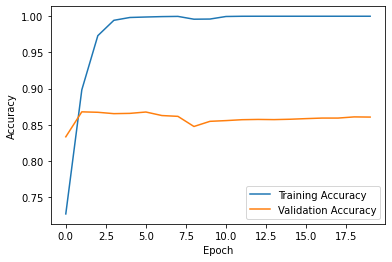

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Train the model
history = model.fit(
    X_train_pad, y_train_encoded, epochs=20, verbose=True, 
    validation_split=0.2, batch_size=40)
    
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Results of shallow model

In [22]:
# Model evaluation
loss, accuracy = model.evaluate(X_train_pad, y_train_encoded, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test_pad, y_test_encoded, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9721
Testing Accuracy:  0.8582


313/313 [==============================] - 1s 2ms/step


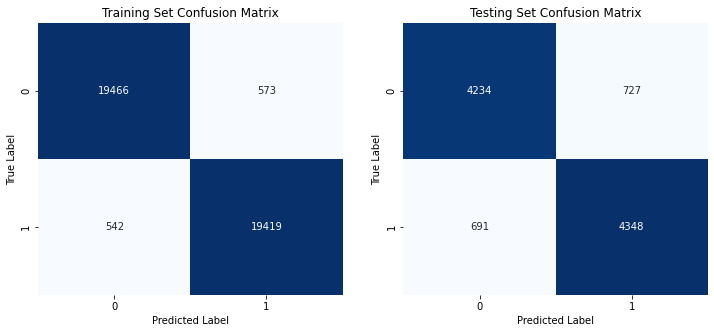

Training F1 Score: 0.9721
Testing F1 Score: 0.8598


In [23]:
# Model evaluation
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
y_train_pred = (model.predict(X_train_pad) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

# F1 Score
f1_train = f1_score(y_train_encoded, y_train_pred)
f1_test = f1_score(y_test_encoded, y_test_pred)

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Testing Set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

# Print F1 Score
print("Training F1 Score: {:.4f}".format(f1_train))
print("Testing F1 Score: {:.4f}".format(f1_test))

In [24]:
from sklearn.metrics import precision_score, recall_score
# Precision and Recall
precision_train = precision_score(y_train_encoded, y_train_pred)
recall_train = recall_score(y_train_encoded, y_train_pred)

precision_test = precision_score(y_test_encoded, y_test_pred)
recall_test = recall_score(y_test_encoded, y_test_pred)

# Print Precision and Recall
print("Training Precision: {:.4f}".format(precision_train))
print("Training Recall: {:.4f}".format(recall_train))

print("Testing Precision: {:.4f}".format(precision_test))
print("Testing Recall: {:.4f}".format(recall_test))

Training Precision: 0.9713
Training Recall: 0.9728
Testing Precision: 0.8567
Testing Recall: 0.8629


## LSTM Model

## Compiling model

In [25]:
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, Flatten, LeakyReLU

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=val, trainable=True))
model.add(LSTM(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 235, 100)          11228100  
                                                                 
 lstm (LSTM)                 (None, 10)                4440      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11232551 (42.85 MB)
Trainable params: 11232551 (42.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Fit

Epoch 1/20
800/800 [==============================] - 108s 133ms/step - loss: 0.6765 - accuracy: 0.5512 - val_loss: 0.6302 - val_accuracy: 0.5960
Epoch 2/20
800/800 [==============================] - 115s 143ms/step - loss: 0.3941 - accuracy: 0.8048 - val_loss: 0.3355 - val_accuracy: 0.8601
Epoch 3/20
800/800 [==============================] - 82s 102ms/step - loss: 0.1857 - accuracy: 0.9315 - val_loss: 0.2694 - val_accuracy: 0.8881
Epoch 4/20
800/800 [==============================] - 81s 102ms/step - loss: 0.0980 - accuracy: 0.9680 - val_loss: 0.3322 - val_accuracy: 0.8723
Epoch 5/20
800/800 [==============================] - 81s 102ms/step - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.3587 - val_accuracy: 0.8815
Epoch 6/20
800/800 [==============================] - 82s 102ms/step - loss: 0.0235 - accuracy: 0.9943 - val_loss: 0.4899 - val_accuracy: 0.8746
Epoch 7/20
800/800 [==============================] - 82s 102ms/step - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.5045 - val_

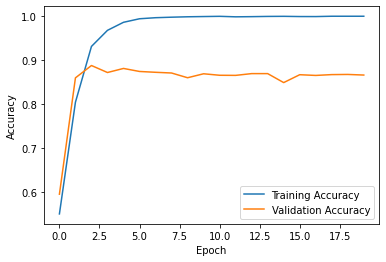

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Train the model
history = model.fit(
    X_train_pad, y_train_encoded, epochs=20, verbose=True, 
    validation_split=0.2, batch_size=40)
    
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Results of LSTM Model

In [27]:
# Model evaluation
loss, accuracy = model.evaluate(X_train_pad, y_train_encoded, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test_pad, y_test_encoded, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9733
Testing Accuracy:  0.8682


313/313 [==============================] - 4s 12ms/step


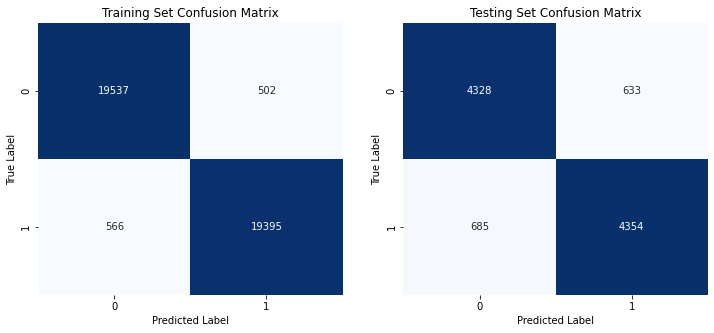

Training F1 Score: 0.9732
Testing F1 Score: 0.8685


In [28]:
# Model evaluation
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
y_train_pred = (model.predict(X_train_pad) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

# F1 Score
f1_train = f1_score(y_train_encoded, y_train_pred)
f1_test = f1_score(y_test_encoded, y_test_pred)

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Testing Set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

# Print F1 Score
print("Training F1 Score: {:.4f}".format(f1_train))
print("Testing F1 Score: {:.4f}".format(f1_test))

In [29]:
from sklearn.metrics import precision_score, recall_score
# Precision and Recall
precision_train = precision_score(y_train_encoded, y_train_pred)
recall_train = recall_score(y_train_encoded, y_train_pred)

precision_test = precision_score(y_test_encoded, y_test_pred)
recall_test = recall_score(y_test_encoded, y_test_pred)

# Print Precision and Recall
print("Training Precision: {:.4f}".format(precision_train))
print("Training Recall: {:.4f}".format(recall_train))

print("Testing Precision: {:.4f}".format(precision_test))
print("Testing Recall: {:.4f}".format(recall_test))

Training Precision: 0.9748
Training Recall: 0.9716
Testing Precision: 0.8731
Testing Recall: 0.8641


## BLSTM Model

## Model Compile

In [35]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=val, trainable=True))
model.add(layers.Bidirectional(layers.LSTM(10, activation='relu')))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 235, 100)          11228100  
                                                                 
 bidirectional_2 (Bidirecti  (None, 20)                8880      
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11237001 (42.87 MB)
Trainable params: 11237001 (42.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Fit

Epoch 1/20
800/800 [==============================] - 101s 124ms/step - loss: 0.6770 - accuracy: 0.5924 - val_loss: 0.5935 - val_accuracy: 0.6432
Epoch 2/20
800/800 [==============================] - 106s 133ms/step - loss: 0.5682 - accuracy: 0.7039 - val_loss: 0.4794 - val_accuracy: 0.7884
Epoch 3/20
800/800 [==============================] - 118s 147ms/step - loss: 0.4193 - accuracy: 0.8172 - val_loss: 0.4083 - val_accuracy: 0.8364
Epoch 4/20
800/800 [==============================] - 115s 144ms/step - loss: 0.2993 - accuracy: 0.8765 - val_loss: 0.3930 - val_accuracy: 0.8472
Epoch 5/20
800/800 [==============================] - 114s 143ms/step - loss: 0.3046 - accuracy: 0.8698 - val_loss: 0.4781 - val_accuracy: 0.7819
Epoch 6/20
800/800 [==============================] - 100s 124ms/step - loss: 0.2243 - accuracy: 0.9118 - val_loss: 0.4302 - val_accuracy: 0.8382
Epoch 7/20
800/800 [==============================] - 100s 125ms/step - loss: 0.1793 - accuracy: 0.9322 - val_loss: 0.5424 -

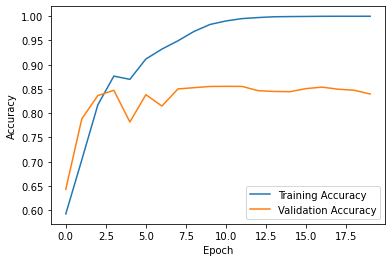

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Train the model
history = model.fit(
    X_train_pad, y_train_encoded, epochs=20, verbose=True, 
    validation_split=0.2, batch_size=40)
    
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Results of BLSTM Model

In [37]:
# Model evaluation
loss, accuracy = model.evaluate(X_train_pad, y_train_encoded, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test_pad, y_test_encoded, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9678
Testing Accuracy:  0.8407


313/313 [==============================] - 6s 18ms/step


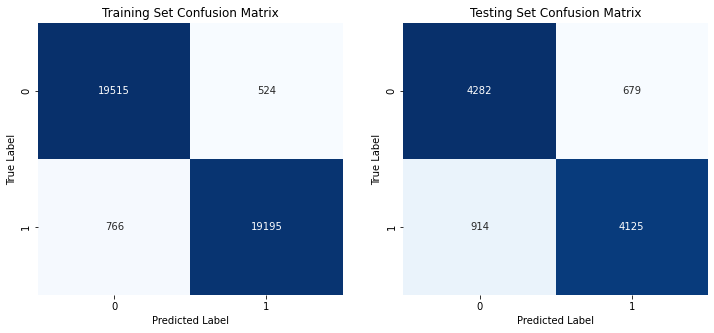

Training F1 Score: 0.9675
Testing F1 Score: 0.8382


In [38]:
# Model evaluation
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
y_train_pred = (model.predict(X_train_pad) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

# F1 Score
f1_train = f1_score(y_train_encoded, y_train_pred)
f1_test = f1_score(y_test_encoded, y_test_pred)

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Testing Set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

# Print F1 Score
print("Training F1 Score: {:.4f}".format(f1_train))
print("Testing F1 Score: {:.4f}".format(f1_test))

In [39]:
from sklearn.metrics import precision_score, recall_score
# Precision and Recall
precision_train = precision_score(y_train_encoded, y_train_pred)
recall_train = recall_score(y_train_encoded, y_train_pred)

precision_test = precision_score(y_test_encoded, y_test_pred)
recall_test = recall_score(y_test_encoded, y_test_pred)

# Print Precision and Recall
print("Training Precision: {:.4f}".format(precision_train))
print("Training Recall: {:.4f}".format(recall_train))

print("Testing Precision: {:.4f}".format(precision_test))
print("Testing Recall: {:.4f}".format(recall_test))

Training Precision: 0.9734
Training Recall: 0.9616
Testing Precision: 0.8587
Testing Recall: 0.8186
